# MSP - 2. projekt 

Jakub Kuzník (xkuzni04@stud.fit.vutbr.cz)  
Statistika a pravděpodobnost (MSP)  
FIT VUT, 2023/2024  


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.optimize import minimize
from scipy.stats import truncnorm, kstest
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Bayesovské odhady - úloha 1

### a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení

Předpokládáme, že počet připojení na internetovou síť za 1 ms je popsaný náhodnou veličinou s Poissonovým rozdělením s parametrem 𝜆, t.j. 𝑋~𝑃𝑜(𝜆).

O parametru 𝜆 máme následující expertní odhad: každých 5 ms by mělo nastat 10 připojení. 

Pozorovali jsme připojení po dobu 100 ms. Pozorovaní o počtu připojení za každou 1 ms jsou uvedené v souboru measurements.csv ve sĺoupci „úloha_1 a)“.

Vašim zadáním je z této expertní informace urči konjugované apriorní rozdělení k parametru Poissonova rozdělení a na základě pozorovaní určit aposteriorní rozdělení. Dále určete apriorní a aposteriorní prediktivní rozdělení pozorovaní. 

1) Do jednoho obrázku vykreslíte apriorní a aposteriorní hustotou parametru Poissonova rozdělení 𝜆.

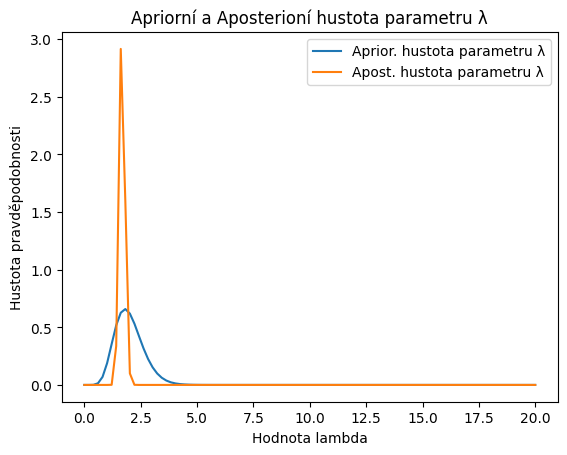

In [3]:
# zvolme si lambdu 
l_prior = 10 / 5
# Alfa je počet výskytů 
# Beta je počet navazanych spojeni  
alfa_prior=10
beta_prior=5 

# Na základě našich dat převedeme aprior. na poster. pravděpodobnost 
data_uloha_1 = pd.read_csv('1-measurements.csv')
data_pozorovani_1a = data_uloha_1['uloha_1 a)'].dropna().tolist()

# Aktualizace apriorní pravděpodobnosti na aposteriorní pravděpodobnost
alfa_posterior = alfa_prior + np.sum(data_pozorovani_1a)
beta_posterior = beta_prior + len(data_pozorovani_1a)
# nova lambda 
l_posterior = alfa_posterior / beta_posterior

x = np.linspace(0, 20, 100)

# Hustota parametru 𝜆 
gama_prior = gamma.pdf(x, alfa_prior, scale=1/beta_prior)
gama_posterior = gamma.pdf(x, alfa_posterior, scale=1/beta_posterior)


# Vykreslení
plt.plot(x, gama_prior, label='Aprior. hustota parametru λ')
plt.plot(x, gama_posterior, label='Apost. hustota parametru λ')

plt.title('Apriorní a Aposterioní hustota parametru λ')
plt.xlabel('Hodnota lambda')
plt.ylabel('Hustota pravděpodobnosti')
plt.legend()
plt.show()

2) Do jednoho obrázku vykreslíte apriorní a aposteriorní prediktivní hustotou pozorovaní 𝑥 za jeden časový interval.

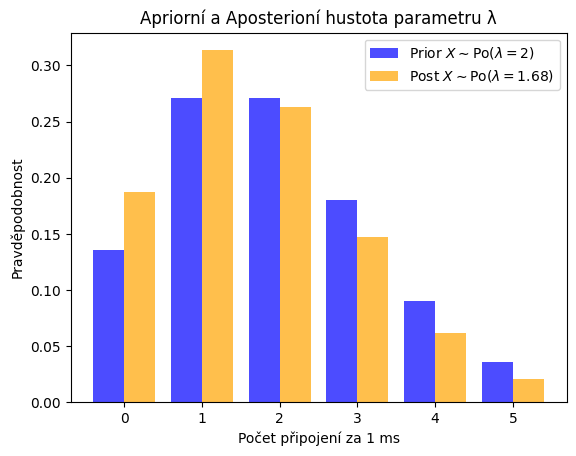

In [4]:
# Vygenerujme rozumně velké pole hodnot osy x 
x_axis = np.arange(0, 6)

# prior hustota pravědepodobnosti 
hustota_pst_prior = poisson.pmf(x_axis, l_prior)

# Vykreslení aposteriorní pravděpodobnosti
x_posterior = np.linspace(0, 20, 1000)

# posterior hustota pravědepodobnosti 
hustota_pst_posterior = poisson.pmf(x_posterior, l_posterior)


# Vykreslení grafů
# Vykreslení apriorní a aposteriorní pravděpodobnosti na jednom grafu s různými barvami
plt.bar(x_axis - 0.2, hustota_pst_prior, width=0.4, color='blue', align='center', \
        alpha=0.7, label=r'Prior $X \sim \mathrm{Po}(\lambda=2)$')
plt.bar(x_axis + 0.2, poisson.pmf(x_axis, l_posterior), width=0.4, color='orange', \
        align='center', alpha=0.7, label=fr'Post $X \sim \mathrm{{Po}}(\lambda={l_posterior:.2f})$')

plt.title('Apriorní a Aposterioní hustota parametru λ')
plt.xlabel('Počet připojení za 1 ms')
plt.ylabel('Pravděpodobnost')
plt.legend()
plt.show()

3) Sestrojte 95% interval spolehlivosti pro parametr 𝜆 z apriorního a aposteriorního rozdělení a porovnejte je.

In [5]:
prior_interval = gamma.interval(0.95, alfa_prior, scale=1/beta_prior)
posterior_interval = gamma.interval(0.95, alfa_posterior, scale=1/beta_posterior)

print("Apriorní 95% Interval spolehlivosti pro parametr 𝜆:   \n     ", prior_interval)
print("Aposteriorní 95% Interval spolehlivosti pro parametr 𝜆: \n     ", posterior_interval)
print("Můžeme vidět, že s zvyšeným počtem měření se náš odhad lambdy postupně")
print("Upřesňuje, tedy interval pro aposteriorní pravděpodobnost je menší.")

Apriorní 95% Interval spolehlivosti pro parametr 𝜆:   
      (0.9590777392264868, 3.416960690283833)
Aposteriorní 95% Interval spolehlivosti pro parametr 𝜆: 
      (1.4376938284869922, 1.9327207471868797)
Můžeme vidět, že s zvyšeným počtem měření se náš odhad lambdy postupně
Upřesňuje, tedy interval pro aposteriorní pravděpodobnost je menší.


4) Vyberte si dva aposteriorní bodové odhady parametru 𝜆, porovnejte je a okomentujte jejich výběr.

In [6]:
median_posterior = gamma.ppf(0.5, alfa_posterior, scale=1/beta_posterior)
lower_bound_posterior = posterior_interval[0]

print("Aposteriorní median parametru 𝜆: {:.2f}".format(median_posterior))
print("Aposteriorní dolní hranice 95% intervalu spolehlivosti pro parametr 𝜆: {:.2f}".format(lower_bound_posterior))
print()

print("Zvolili jsme tyto dva bodové odhady. Jeden z nich je median a druhy je spodní")
print("hodnota 95% intervalu spolehlivosti. Zajímavé na nich je, že 𝜆=medián má vůbec ")
print("největší pravděpodobnost toho, že by \"vygeneroval\" naše naměřené hodnoty. ")
print("Naopak spodní stejně tak horní hranice 95% intervalu mají nejmenší pravděpodobnost  ")
print("pro \"vygenerování\" našich hodnot, pokud se omezíme na 95% interval spolehlivosti.")

Aposteriorní median parametru 𝜆: 1.67
Aposteriorní dolní hranice 95% intervalu spolehlivosti pro parametr 𝜆: 1.44

Zvolili jsme tyto dva bodové odhady. Jeden z nich je median a druhy je spodní
hodnota 95% intervalu spolehlivosti. Zajímavé na nich je, že 𝜆=medián má vůbec 
největší pravděpodobnost toho, že by "vygeneroval" naše naměřené hodnoty. 
Naopak spodní stejně tak horní hranice 95% intervalu mají nejmenší pravděpodobnost  
pro "vygenerování" našich hodnot, pokud se omezíme na 95% interval spolehlivosti.


5) Vyberte si jeden apriorní a jeden aposteriorní bodový odhad počtu pozorovaní a
porovnejte je. 

In [7]:
print("Apriorní median parametru 𝜆: {:.2f}".format(l_prior))
print("Aposteriorní median parametru 𝜆: {:.2f}".format(median_posterior))
print()
print("Zvolili jsme tyto dva bodové odhady. Oba jsou mediánem.")
print("Zajímavé na nich je, že s novými pozorováními se náš apriorní odhad")
print("upřesnil k menší aposteriorní hodnotě a z větší pravděpodobností dokážeme ")
print("říci že, data byly vygenerovány právě z této hodnoty. ")

Apriorní median parametru 𝜆: 2.00
Aposteriorní median parametru 𝜆: 1.67

Zvolili jsme tyto dva bodové odhady. Oba jsou mediánem.
Zajímavé na nich je, že s novými pozorováními se náš apriorní odhad
upřesnil k menší aposteriorní hodnotě a z větší pravděpodobností dokážeme 
říci že, data byly vygenerovány právě z této hodnoty. 


### b) Aproximace diskrétním rozdělením

Integrál ve jmenovateli Bayesově větě je ve většině praktických aplikací důvodem, proč nejsme schopní odvodit aposteriorní hustotu analyticky. Jeden ze způsobů, jak překonat tento problém a odhadnout parametru (ne vektor parametrů) je, že zvolíme diskrétní aproximaci a neřešitelný integrál přejde na sumu.

Poznámka:
Nyní řešíme odhad aposteriorní hustoty a paramertů v případě, že apriorní informace (hustota) je ve formě naměřených hodnot (sloupec „uloha_1 b)_prior“) a rozdělení procesu, který sledujete, je také ve tvaru naměřených hodnot (sloupec „uloha_1 b)_pozorovania“). Tedy místo zadání dvou hustot máme naměřené hodnoty a s pomocí tříděného statistického souboru odhadneme hustoty. Pak se plocha pod hustotou spočítá součtem četností (obdoba numerického počítání integrálu obdélníkovou metodou).

Víme, že délka zpracování procesu v milisekundách ms má odseknuté normální rozdělení (truncated normal distribution) s parametry
𝜇 = 3, 𝜎
2 = 1, 𝑎 = 1

Naší úlohou je odhadnout parametr 𝑏, t.j. maximální dobu trvání procesu. Máme historické záznamy o jeho délce trvání (sloupec „uloha 1 a)_prior“) na počítačích podobné výkonové řady. Provedli jsme sérii pozorovaní po 10, číslo série pozorovaní v tabulce v sloupci „skupina“. Z těchto záznamů vyjádříte apriorní informaci o parametru 𝑏.

Ve sloupci „uloha_1 b)_pozorovania“ jsou naše pozorování délky trvání procesu Vyjádřete funkci věrohodnosti (sloupec „uloha_1 b)_pozorovania“) (v tomto případe také jen její diskrétní aproximace) a následně diskrétní aposteriorní hustotu.

1) Do jednoho grafu vykreslíte apriorní, aposteriorní hustotou a funkci věrohodnosti.
Funkci věrohodnosti normujte tak, aby jej součet byl 1 kvůli porovnatelnosti
v obrázku.

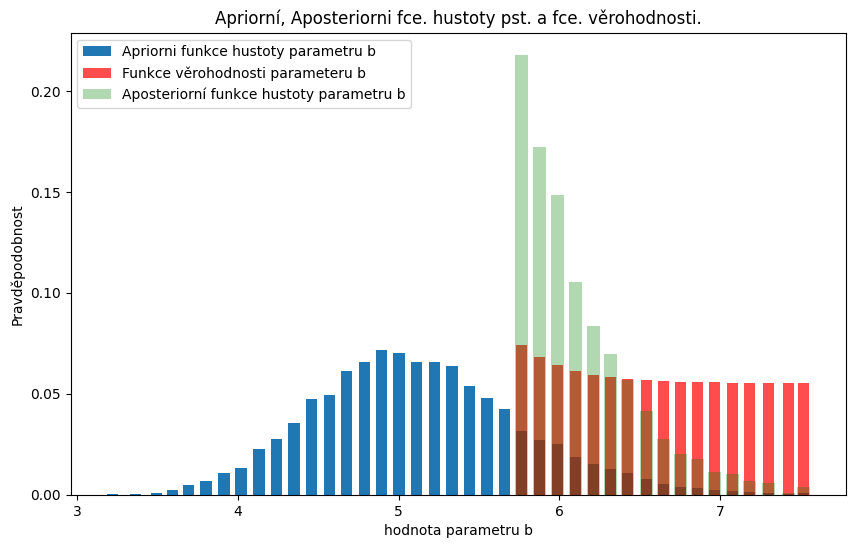

In [8]:
# # Historicke zaznamy o delce trvání zpracování procesu 
# serie pozorovani po 10 
# ([délka trváni],[serie_pozorovani])
data_1b_prior = data_uloha_1[['uloha_1 b)_prior', 'skupina']].dropna()
# Nase pozorovani délky trvání procesu 
data_1b_pozorovani = data_uloha_1['uloha_1 b)_pozorování'].dropna().tolist()
data_1b_pozorovani = np.array(list(map(float, data_1b_pozorovani)))

# kolik budeme mit bins 
DISK_HODN=40

### APRIOR 
# b odhadujeme (maximální dobu trvání zpracování procesu)
# najdu nejvetsi hodnotu v kazde skupine 
idxmax_values = data_1b_prior.groupby('skupina')['uloha_1 b)_prior'].idxmax()
# z techto nejvetsich hodnot udelame datovou sadu 
new_dataset_1b = data_1b_prior.loc[idxmax_values]
# Vytvorime diskretni rozdeleni pro nasi novou sadu 
#    tak ze cely interval hodnot rozdelime na x hodnot 
#   - kazdemu intervalu dame představitele (střední hodnotu) 
#   - timto ziskame ruzne pravdepodobnoti pro parametr B
grouped_counts = pd.cut(new_dataset_1b['uloha_1 b)_prior'], bins=DISK_HODN).value_counts()
# seřazení podle intervalu 
grouped_counts = grouped_counts.sort_index()
# Střední hodnoty pro každý bin
grouped_means = new_dataset_1b.groupby(pd.cut(new_dataset_1b['uloha_1 b)_prior'], bins=DISK_HODN), observed=False).mean()
# Spojeni strednich hodnot a jejich vyskytu do noveho datasetu 
mean_occur_1b = pd.DataFrame({'mean': grouped_means['uloha_1 b)_prior'], 'occurrence': grouped_counts})
# Reset index 
mean_occur_1b.reset_index(inplace=True)
# celkovy pocet vyskytu
total_occurrences = mean_occur_1b['occurrence'].sum()
# pravdepodobnost jednotlivych hodnot b 
mean_occur_1b['probability'] = mean_occur_1b['occurrence'] / total_occurrences
# Při 40 BINS je největší pravděpodobnost pro B 
# B=4.893907
#    uloha_1 b)_prior      mean  occurrence  probability
# 15   (4.839, 4.948]  4.893907         717       0.0717


## FUNKCE VĚROHODNOSTI 
# data (D) jsou v data_1b_pozorovani
mu_1b=3
sigma_1b=1
a_1b=1 
b_1b = mean_occur_1b['mean'][0]
prior_prob_b = mean_occur_1b['probability'][0]

# Verohodnostni funkce 
# Spočítáme  (d_j | b_i)  
probs_b1 = []
for i in range(len(mean_occur_1b['mean'].tolist())):
    b_1b = mean_occur_1b['mean'][i]
    prior_prob_b = mean_occur_1b['probability'][i]

    a_scaled = (a_1b - mu_1b) / sigma_1b
    b_scaled = (b_1b - mu_1b) / sigma_1b
    tr = truncnorm(a_scaled, b_scaled, loc=mu_1b, scale=sigma_1b)
    prob = np.prod([tr.pdf(d) for d in data_1b_pozorovani])
    probs_b1.append(prob)

# Normalizace
verohodnost_1b = np.array(probs_b1) / np.sum(probs_b1)

## APOSTERIOR  
# (d_j | b_i) * h(b_i)
x_b1 = []
for i in range(len(probs_b1)):
    xi_b1 = probs_b1[i] * mean_occur_1b['probability'][i]
    x_b1.append(xi_b1)

#Σ_i( Π_j (d_j | b_i) * h(b_i) / Σ_i( Π_j (d_j | b_i) * h(b_i))
posterior_b1 = x_b1 / np.sum(x_b1)

plt.figure(figsize=(10, 6))
plt.bar(mean_occur_1b['mean'], mean_occur_1b['probability'], label='Apriorni funkce hustoty parametru b', width=0.07)
plt.bar(mean_occur_1b['mean'], verohodnost_1b, width=0.07, label='Funkce věrohodnosti parameteru b', color='red', alpha=0.7)
plt.bar(mean_occur_1b['mean'], posterior_b1, width=0.08, label='Aposteriorní funkce hustoty parametru b', color='green', alpha=0.3)
plt.xlabel('hodnota parametru b')
plt.ylabel('Pravděpodobnost')
plt.title('Apriorní, Aposteriorni fce. hustoty pst. a fce. věrohodnosti.')
plt.legend(loc='upper left')

plt.show()

2) Z aposteriorní hustoty určete 95% interval spolehlivosti (konfidenční interval) pro
parametr 𝑏.

In [9]:
# Vyuzijeme nahodneho vzorkovani 
vzorek_b1 = np.random.choice(mean_occur_1b['mean'].tolist(), size=10000, p=posterior_b1)
lower_bound, upper_bound = np.percentile(vzorek_b1, [2.5, 97.5])
# Interval spolehlivosti je hodne ovlivnen nasim 
print(f"95% Interval spolehlivosti: <{lower_bound:.4f}, {upper_bound:.4f}>")

95% Interval spolehlivosti: <5.7664, 7.0766>


3) Vyberte dva bodové odhady parametru 𝑏 a spočítejte je.

In [10]:
prumer_b1 = np.mean(vzorek_b1)
median_b1 = np.median(vzorek_b1)

print("Bodové odhady z posteriorní funkce hustoty pravdepodobnosti parametru b")
print(f"Průměr: {prumer_b1:.4f}")
print(f"Medián: {median_b1:.4f}")

Bodové odhady z posteriorní funkce hustoty pravdepodobnosti parametru b
Průměr: 6.1214
Medián: 5.9883


## Regrese - úloha 2

Podařilo se Vám pomocí stroje času vrátit do doby „zlatého věku“ sociálních sítí a rozhodli jste se konkurovat Facebooku a Twitteru. V souboru Data_v1.0.csv máte k dispozici záznamy od více než 500 uživatelů o rychlosti odezvy (sloupec ping [ms]) během používání Vaší aplikace. Ke každému zápisu máte navíc k dispozici o počtu uživatelů (sloupec ActiveUsers) v daném okamžiku, o procentu uživatelů, kteří momentálně interagují s prezentovaným obsahem (sloupec InteractingPct), o procentu uživatelů, kteří jen tupě scrollují po Vaší obdobě timeline/twitterfeedu (sloupec ScrollingPct) a o operačním systému zařízení ze kterého se uživatel připojil (OSType).

1) Pomocí zpětné eliminace určete vhodný regresní model. Za výchozí „plný“ model
považujte plný kvadratický model (všechny interakce druhého řádu a všechny druhé
mocniny, které dávají smysl).
- Zapište rovnici Vašeho finálního modelu.


In [73]:
df_2 = pd.read_csv('Data_v1.0.csv')

# Prvně převedeme kategorické atributy na kvantitativní a datový typ float
df_2 = pd.get_dummies(df_2, columns=['OSType'], prefix='OSType', drop_first=True)
df_2 = df_2.astype({'OSType_Windows': 'float64', 'OSType_MacOS': 'float64', 'OSType_iOS': "float64"})

# Zjistime jestli mezi dvemi atributy je úplna korelace, tedy poskytují stejnou
#   informaci, atedy jeden atribut můžeme odstranit.
corr_2 = df_2.corr() 
# Zjistili jsme že je zde závislost InteractingPct a ScrollingPct, 
#   čili odebereme jeden atribut.
df_2.drop(['ScrollingPct'], axis=1, inplace=True)



### ZDE JE POSTUP REDUKCE, PARAMETRU NASEHO MODELU, KTERY ZADANI NEVYZADUJE
# Vyrobíme naš úplný kvadratikcý model, kde je naší závislou proměnou odezva [ms]
# Nemá smyls dělat dvojice atributů, které byly původně kategorické 
# x_y_2   = 'ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows + OSType_iOS'
# xy_2    = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + \
#            ActiveUsers:OSType_iOS + InteractingPct:OSType_MacOS + InteractingPct:OSType_Windows + \
#            InteractingPct:OSType_iOS'
# x2_y2_2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
# # PIN = 
# quad_2  = 'Q("Ping [ms]") ~ ' + x_y_2 + ' + ' + xy_2 + ' + ' + x2_y2_2

# print("Vychozí kvadratický model je:")
# print("Ping [ms] =   A*ActiveUsers + B*InteractingPct + C*OSType_MacOS + D*OSType_Windows + E*OSType_iOS")
# print("            + F*ActiveUsers*InteractingPct  + G*ActiveUsers*OSType_MacOS")
# print("            + H*ActiveUsers*OSType_Windows  + I*ActiveUsers*OSType_iOS")
# print("            + J*InteractingPct*OSType_MacOS + K*InteractingPct*OSType_Windows")
# print("            + L*InteractingPct*OSType_iOS")
# print("            + M*ActiveUsers^2 + N*InteractingPct^2")
# print("")
# print("Kde A,B,C,D,E,F,G,H,I,J,K,L,M,N jsou konstanty")

# model = smf.ols(formula=quad_2, data=df_2)
# res_2 = model.fit()

# VIF 1 
#                                     VIF
# Intercept                      79.081437
# ActiveUsers                    30.108570
# InteractingPct                 26.021105
# OSType_MacOS                   14.530955
# OSType_Windows                 13.726080
# OSType_iOS                     13.164975
# ActiveUsers:InteractingPct      8.851002
# ActiveUsers:OSType_MacOS       10.454073
# ActiveUsers:OSType_Windows     10.189613
# ActiveUsers:OSType_iOS          9.061267
# InteractingPct:OSType_MacOS     7.586537
# InteractingPct:OSType_Windows   6.857633
# InteractingPct:OSType_iOS       6.028016
# I(ActiveUsers ** 2)            22.499134
# I(InteractingPct ** 2)         16.060875
# V_2 = pd.DataFrame(model.exog, columns=model.exog_names)
# vif = pd.Series([variance_inflation_factor(V_2.values, i) 
#                 for i in range(V_2.shape[1])], 
#                 index = V_2.columns)
# vif_df = vif.to_frame()
# # Nastavení názvu sloupce
# vif_df.columns = ['VIF']


# Pomoci koeficientu VIF jsme při první iteraci zjistili, že můžeme odstranit 
# následující atributy: InteractingPct OSType a ActiveUser 
# x_y_2   = ''
# xy_2    = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + \
#            ActiveUsers:OSType_iOS + InteractingPct:OSType_MacOS + InteractingPct:OSType_Windows + \
#            InteractingPct:OSType_iOS'
# x2_y2_2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
# quad_2  = 'Q("Ping [ms]") ~ ' + x_y_2 + ' + ' + xy_2 + ' + ' + x2_y2_2
# model = smf.ols(formula=quad_2, data=df_2)
# res_2 = model.fit()

#                                    VIF
#Intercept                      4.666081
#ActiveUsers:InteractingPct     6.203778
#ActiveUsers:OSType_MacOS       3.896648
#ActiveUsers:OSType_Windows     4.328035
#ActiveUsers:OSType_iOS         3.480861
#InteractingPct:OSType_MacOS    4.626841
#InteractingPct:OSType_Windows  4.276348
#InteractingPct:OSType_iOS      3.665162
#I(ActiveUsers ** 2)            4.150080
#I(InteractingPct ** 2)         6.163991

# V_2 = pd.DataFrame(model.exog, columns=model.exog_names)
# vif = pd.Series([variance_inflation_factor(V_2.values, i) 
#                 for i in range(V_2.shape[1])], 
#                 index = V_2.columns)
# vif_df = vif.to_frame()
# # Nastavení názvu sloupce
# vif_df.columns = ['VIF']


# print(res_2.summary())
#=================================================================================================
#                                   coef    std err          t      P>|t|      [0.025      0.975]
#-------------------------------------------------------------------------------------------------
#Intercept                        31.9087      0.775     41.153      0.000      30.385      33.432
#ActiveUsers:InteractingPct       -0.0001      0.000     -0.265      0.792      -0.001       0.001
#ActiveUsers:OSType_MacOS          0.0021      0.000      8.086      0.000       0.002       0.003
#ActiveUsers:OSType_Windows        0.0004      0.000      1.407      0.160      -0.000       0.001
#ActiveUsers:OSType_iOS           -0.0006      0.000     -2.393      0.017      -0.001      -0.000
#InteractingPct:OSType_MacOS      -1.5019      2.678     -0.561      0.575      -6.764       3.761
#InteractingPct:OSType_Windows     4.0470      2.913      1.389      0.165      -1.676       9.770
#InteractingPct:OSType_iOS        -1.9417      2.845     -0.682      0.495      -7.532       3.649
#I(ActiveUsers ** 2)            2.832e-07   2.56e-08     11.045      0.000    2.33e-07    3.34e-07
#I(InteractingPct ** 2)           17.1305      2.933      5.841      0.000      11.368      22.893

## ITERUJEME DOKUD NEDOKONVERGUJEME K RESENI KDE P-hodnoty jsou mensi nez 0.05
# vzdy odstranime jednotlive hodnoty


x_y_2   = ''
xy_2    = 'ActiveUsers:OSType_MacOS + \
           ActiveUsers:OSType_iOS  + InteractingPct:OSType_Windows'
x2_y2_2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
quad_2  = 'Q("Ping [ms]") ~ ' + x_y_2 + ' + ' + xy_2 + ' + ' + x2_y2_2
model = smf.ols(formula=quad_2, data=df_2)
res_2 = model.fit()
print(res_2.summary())
print("Vychozí kvadratický model je:")
print()
print("Ping [ms] =   A*ActiveUsers*OSType_MacOS + B*ActiveUsers*OSType_iOS")
print("              + C*InteractingPct*OSType_Windows")
print("              + D*ActiveUsers^2 + E*InteractingPct^2")
print("")
print("                      Kde A,B,C,D,E jsou konstanty")


                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     241.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.51e-130
Time:                        22:17:12   Log-Likelihood:                -1754.8
No. Observations:                 502   AIC:                             3522.
Df Residuals:                     496   BIC:                             3547.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

- Diskutujte splnění předpokladů lineární regrese a základní regresní
diagnostiky.

In [89]:
print("Některé předpoklady původně nebyly splněny, jako třeba lineární závislost,")
print("nekorelovanost, ale jak jsme zjednodušovali model, tak jsme postupně spl- ")
print("nili všechny předpoklady lin. regrese. Většinu věci můžeme ověřit graficky")
print("nebo můžeme použít různé formy statistických testů.")
print("")
print("Předpoklady a diagnostiky lineární regrese")
print(" -Lineární nezávislost (SPLNĚNO)")
print("    Proto, aby naše lineární regrese fungovala je potřeba aby v matici plánu")
print("     nebyly lineární závislosti.")
print()
print("     Lineární závislost můžeme zjistit z OLS Regression Results, kde pokus vy-")
print("     jdou nesmyslné hodnoty, tak je zde pravděpodobně lineární závislost.")
print("     Dalším diagnostickým nástrojem může být manuální ověření lineární závi-")
print("     slosti tak jak jej známe z lineární algebry nebo třeba využití determi-")
print("     nantu korelační matice, ten pokud se blízky nule, tak data mohou mít")
print("     lineární závislost.")
print()
print(" -Střední hodnota (SPLNĚNO)")
print("    Náhodná veličina Ping [ms] má střední hodnotu odpovídající střední ho-")
print("    tě modelu EX = Σ_i βj*f(x)")
print() 
print("    Můžeme ověřit zda-li střední hodnota našeho modelu odpovídá střední ")
print("    hodnotě původních dat, tedy suma našich β koeficientu by měla odpovídat  ")
print("    střední hodnotě původních dat, což také odpovídá.")
print()
print(" -Konstatní rozptyl (SPLNĚNO)")
print("    Náhodná veličina Ping [ms] má konstantí rotpyl")
print("    Měli bychom ověřit zda-li nám v datech nevzniká nějaká Heteroskedasticita,")
print("    což můžeme ověřit graficky nebo pomocí Cook-Weisbergova testu.")
print("")
print(" -Nekorelovanost (SPLNĚNO)")
print("    Náhodná veličina Ping [ms] je nekorelovaná")
print("")
print("    Durbin-Watsonův test nezávislosti nám vratí koef. d Pokud")
print("    d ≈ 2nezamítáme nezávislost, jinak jsou hodnoty zavislé na X. naše d = 1.91")
print("")
print(" -Normální rozdělení (SPLNĚNO)")
print("    Náhodná veličina Ping [ms] má normální rozdělení pravděpodobnosti i=1,..,n")
print()
print("    Ověření normální rozdělení můžeme graficky pomocí histogramu, kdy si zobrazí-")
print("    četnost jednotlivých hodnot, to by mělo mít tvar přibližně jako gausovka. Z ")
print("    čehož plyne, že by naše data měla mít přibližně stejnou střední hodnotu a ")
print("    průměr. Obojí je u naších dat splněno. Střední hodnota je asi 50.5 a průměrná")
print("    hodnota je 52. Dále take Q-Q plot P-P plot a Pearson χ2, Kolmogoriv-Smirnov,")
print("    Anderson-Darling.")


### rezidua vs poradi 
# zkoumam ze se mi postupone nezvetsuji nebo nezmensuji rezidua kdyz postupuju po mem modelu 



Některé předpoklady původně nebyly splněny, jako třeba lineární závislost,
nekorelovanost, ale jak jsme zjednodušovali model, tak jsme postupně spl- 
nili všechny předpoklady lin. regrese. Většinu věci můžeme ověřit graficky
nebo můžeme použít různé formy statistických testů.

Předpoklady a diagnostiky lineární regrese
 -Lineární nezávislost (SPLNĚNO)
    Proto, aby naše lineární regrese fungovala je potřeba aby v matici plánu
     nebyly lineární závislosti.

     Lineární závislost můžeme zjistit z OLS Regression Results, kde pokus vy-
     jdou nesmyslné hodnoty, tak je zde pravděpodobně lineární závislost.
     Dalším diagnostickým nástrojem může být manuální ověření lineární závi-
     slosti tak jak jej známe z lineární algebry nebo třeba využití determi-
     nantu korelační matice, ten pokud se blízky nule, tak data mohou mít
     lineární závislost.

 -Střední hodnota (SPLNĚNO)
    Náhodná veličina Ping [ms] má střední hodnotu odpovídající střední ho-
    tě modelu EX = Σ_i βj

In [379]:
# comm

- Pokud (až během regresního modelování) identifikujete některé „extrémně
odlehlé hodnoty“ můžete ty „nejodlehlejší“ hodnoty, po alespoň krátkém
zdůvodnění, vyřadit.

2) Pomocí Vašeho výsledného modelu identifikujte, pro které nastavení parametrů má
odezva nejproblematičtější hodnotu.

3) Odhadněte hodnotu odezvy uživatele s Windows, při průměrném nastavení ostatních
parametrů a vypočtěte konfidenční interval a predikční interval pro toto nastavení.

4) Na základě jakýchkoli vypočtených charakteristik argumentujte, zdali je Váš model
„vhodný“ pro další použití.